<a href="https://colab.research.google.com/github/Git-Hub-Pro/Kalmanfilter/blob/master/pose_orientation_gyro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

In [0]:
input_mat = io.loadmat('/content/gdrive/My Drive/data/kalmanfilter/source/11.ARS/ArsGyro.mat')

In [18]:
print(input_mat)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Thu Feb 25 10:20:01 2010', '__version__': '1.0', '__globals__': [], 'wx': array([[ 0.00015978],
       [ 0.00015978],
       [ 0.00319579],
       ...,
       [ 0.00063916],
       [-0.00431431],
       [-0.00639159]]), 'wy': array([[ 0.00223706],
       [ 0.00319579],
       [-0.00095874],
       ...,
       [ 0.00319579],
       [ 0.006072  ],
       [ 0.00319579]]), 'wz': array([[ 0.0014381 ],
       [-0.00335559],
       [-0.00191747],
       ...,
       [ 0.00527306],
       [-0.00047937],
       [ 0.00127831]])}


In [0]:
def get_gyro(i):
    p = input_mat['wx'][i][0]  # input_mat['wx'] : (41500, 1)
    q = input_mat['wy'][i][0]  # input_mat['wy'] : (41500, 1)
    r = input_mat['wz'][i][0]  # input_mat['wz'] : (41500, 1)
    return p, q, r

각도를 구하기 위해서는 헬기의 각속도를 오일러 각도의 변화율로 변환한 다음 적분을 통하여 각도를 구하여 합니다.

자이로에서 측정한 각속도와 샘플링 시간을 인자로 받아 오일러 각도를 반환합니다. 적분에는 가장 단순한 알고리즘을 사용했습니다. 실전에서는 문제의 종류에 따라 적절한 적분 방법으로 대체하면 됩니다.

매개변수 : p, q, r(각속도), dt(샘플링 시간)
반환값 : 오일러 각도


In [0]:
def euler_gyro(phi,the,psi,p,q,r,dt):
    sinPhi = np.sin(phi)
    cosPhi = np.cos(phi)
    cosThe = np.cos(the)
    tanThe = np.tan(the)
    phi = phi + dt * (p + q * sinPhi * tanThe + r * cosPhi * tanThe)
    the = the + dt * (q * cosPhi - r * sinPhi)
    psi = psi + dt * (q * sinPhi / cosThe + r * cosPhi / cosThe)
    return phi, the, psi

In [0]:
# Input parameters
n_samples = 41500
dt = 0.01

In [0]:
time = np.arange(n_samples) * dt
phi_save = np.zeros(n_samples)
the_save = np.zeros(n_samples)
psi_save = np.zeros(n_samples)

In [0]:
phi, the, psi = 0, 0, 0
for i in range(n_samples):
    p, q, r = get_gyro(i)
    phi, the, psi = euler_gyro(phi,the,psi,p,q,r,dt)
    phi_save[i] = np.rad2deg(phi)
    the_save[i] = np.rad2deg(the)
    psi_save[i] = np.rad2deg(psi)

Text(0, 0.5, 'Yaw ($\\psi$) angle [deg]')

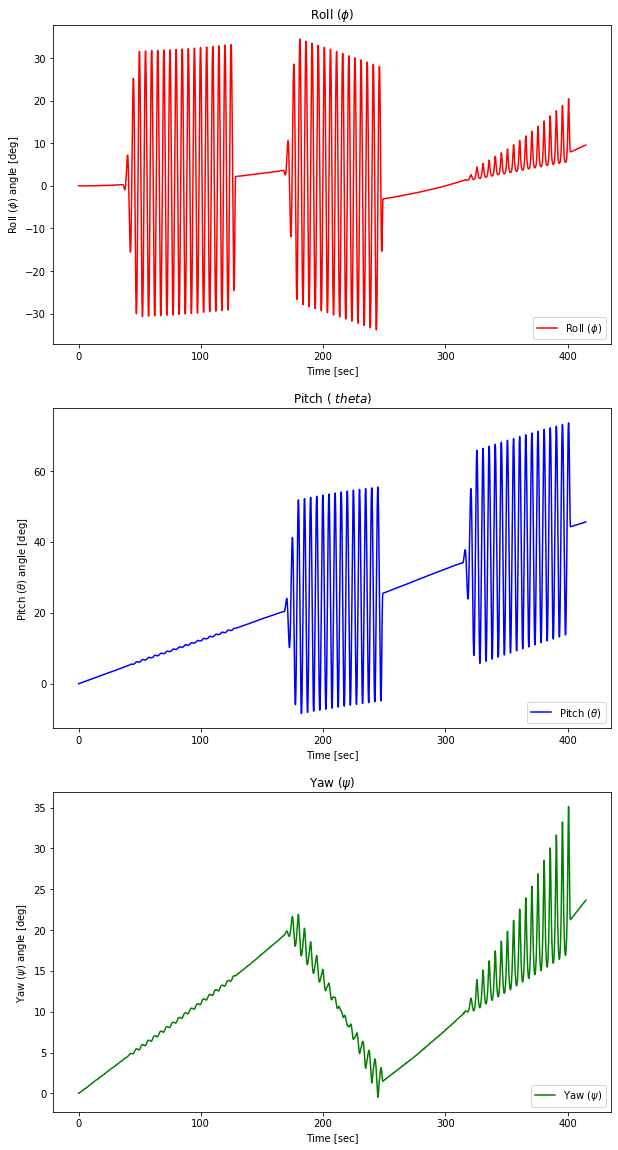

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,20))

plt.subplot(3,1,1)
plt.plot(time,phi_save,'r',label='Roll ($\\phi$)',markersize=0.2)
plt.legend(loc='lower right')
plt.title('Roll ($\\phi$)')
plt.xlabel('Time [sec]')
plt.ylabel('Roll ($\phi$) angle [deg]')

plt.subplot(3,1,2)
plt.plot(time,the_save,'b',label='Pitch ($\\theta$)',markersize=0.2)
plt.legend(loc='lower right')
plt.title('Pitch ($\\ theta$)')
plt.xlabel('Time [sec]')
plt.ylabel('Pitch ($\\theta$) angle [deg]')

plt.subplot(3,1,3)
plt.plot(time,psi_save,'g',label='Yaw ($\\psi$)',markersize=0.2)
plt.legend(loc='lower right')
plt.title('Yaw ($\\psi$)')
plt.xlabel('Time [sec]')
plt.ylabel('Yaw ($\\psi$) angle [deg]')